# Time-Series Analysis and Forecasting with Corn and Wheat Prices

## Part 1 - Import, Check, Visualize, and Join Commodity Price Time-Series Data Together

### A. Import Required Libraries

Import numpy and pandas libraries, and set %matplotlib inline.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### B. Import, Inspect, and Visualize Corn Price Time-Series Data

Import global price of corn comma-separated value (CSV) file into Pandas dataframe called corn.

* This CSV file containing the monthly global price of corn was sourced from the Federal Reserve Economic Data (FRED) site run by the Federal Reserve Bank of Saint Louis, Missouri (St. Louis Fed). The corn price time-series data is not seasonally adjusted. The file was retrieved from <https://fred.stlouisfed.org/series/PMAIZMTUSDM>.

In [2]:
corn = pd.read_csv('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/PMAIZMTUSDM.csv', sep=',')

Create copy of corn price time-series dataframe for inspection and visualization.

In [3]:
corn1 = corn.copy()

View first five rows of corn1 dataframe.

In [4]:
corn1.head()

,DATE,PMAIZMTUSDM
0,1980-01-01,105.506813
1,1980-02-01,114.167831
2,1980-03-01,109.837318
3,1980-04-01,108.262604
4,1980-05-01,109.837318


View last five rows of corn1 dataframe.

In [5]:
corn1.tail()

,DATE,PMAIZMTUSDM
445,2017-02-01,162.880519
446,2017-03-01,158.966282
447,2017-04-01,156.442032
448,2017-05-01,158.591272
449,2017-06-01,157.956013


Check for presence of missing values for DATE and monthly global price of corn (PMAIZMTUSDM).

In [6]:
corn1.isnull().sum().sort_values(ascending=False)

PMAIZMTUSDM    0
DATE           0
dtype: int64

View structure of corn1 dataframe.

In [7]:
corn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
DATE           450 non-null object
PMAIZMTUSDM    450 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


* The DATE variable's data type is an object and needs to be converted into a datetime index. The PMAIZMTUSDM variable should be renamed to indicate that it is the monthly global price of corn.

Rename DATE and PMAIZMTUSDM variable, and convert Date variable into a datetime index.

In [8]:
corn2 = corn1.rename(columns={'DATE':'Date', 'PMAIZMTUSDM':'Corn_Price'})
corn2['Date'] = pd.to_datetime(corn2['Date'])
corn2.set_index('Date', inplace=True)

View first five rows of corn2 dataframe.

In [9]:
corn2.head()

,Corn_Price
Date,
1980-01-01,105.506813
1980-02-01,114.167831
1980-03-01,109.837318
1980-04-01,108.262604
1980-05-01,109.837318


View last five rows of corn2 dataframe.

In [10]:
corn2.tail()

,Corn_Price
Date,
2017-02-01,162.880519
2017-03-01,158.966282
2017-04-01,156.442032
2017-05-01,158.591272
2017-06-01,157.956013


View structure of corn2 dataframe.

In [11]:
corn2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 1 columns):
Corn_Price    450 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


Plot out the global corn price data and choose a reasonable figure size.

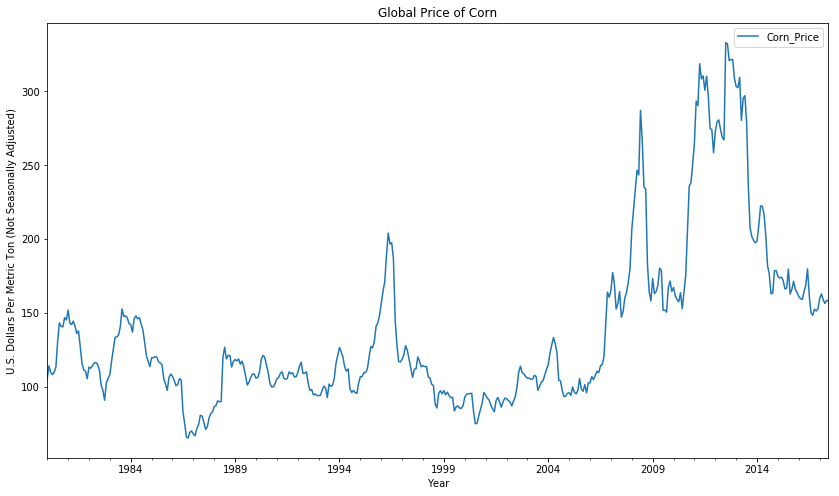

In [12]:
title1 = 'Global Price of Corn'
ylabel1 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel1 = 'Year'

ax1 = corn2.plot(figsize=(14,8), title=title1)
ax1.autoscale(axis='x', tight=True)
ax1.set(xlabel=xlabel1, ylabel=ylabel1);

### C. Import, Inspect, and Visualize Wheat Price Time-Series Data

Import global price of wheat CSV file into Pandas dataframe called wheat and generate datetime index upon import.

* This CSV file containing the monthly global price of wheat was sourced from the FRED site run by the St. Louis Fed. The wheat price time-series data is not seasonally adjusted. The file was retrieved from <https://fred.stlouisfed.org/series/PWHEAMTUSDM>. 

In [13]:
wheat = pd.read_csv('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/PWHEAMTUSDM.csv', index_col='DATE', parse_dates=True)

Create copy of wheat price time-series dataframe for inspection and visualization.

In [14]:
wheat1 = wheat.copy()

View first five rows of wheat1 dataframe.

In [15]:
wheat1.head()

,PWHEAMTUSDM
DATE,
1980-01-01,175.634750
1980-02-01,172.695236
1980-03-01,163.509323
1980-04-01,156.528030
1980-05-01,161.304703


View last five rows of wheat1 dataframe.

In [16]:
wheat1.tail()

,PWHEAMTUSDM
DATE,
2017-02-01,147.313095
2017-03-01,146.387567
2017-04-01,138.412425
2017-05-01,146.486143
2017-06-01,157.196087


Check for presence of missing values for monthly global price of wheat (PWHEAMTUSDM).

In [17]:
wheat1.isnull().sum().sort_values(ascending=False)

PWHEAMTUSDM    0
dtype: int64

View structure of wheat1 dataframe.

In [18]:
wheat1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 1 columns):
PWHEAMTUSDM    450 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


* The PWHEAMTUSDM variable should be renamed to indicate that it is the monthly global price of wheat.

Check data type of wheat1 dataframe index.

In [19]:
wheat1.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01'],
              dtype='datetime64[ns]', name='DATE', length=450, freq=None)

Rename DATE index and PWHEAMTUSDM variable.

In [20]:
wheat2 = wheat1.rename(index={'DATE':'Date'}, columns={'PWHEAMTUSDM':'Wheat_Price'})

View first five rows of wheat2 dataframe.

In [21]:
wheat2.head()

,Wheat_Price
DATE,
1980-01-01,175.634750
1980-02-01,172.695236
1980-03-01,163.509323
1980-04-01,156.528030
1980-05-01,161.304703


View last five rows of wheat2 dataframe.

In [22]:
wheat2.tail()

,Wheat_Price
DATE,
2017-02-01,147.313095
2017-03-01,146.387567
2017-04-01,138.412425
2017-05-01,146.486143
2017-06-01,157.196087


View structure of wheat2 dataframe.

In [23]:
wheat2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 1 columns):
Wheat_Price    450 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


Plot out the wheat price data and choose a reasonable figure size.

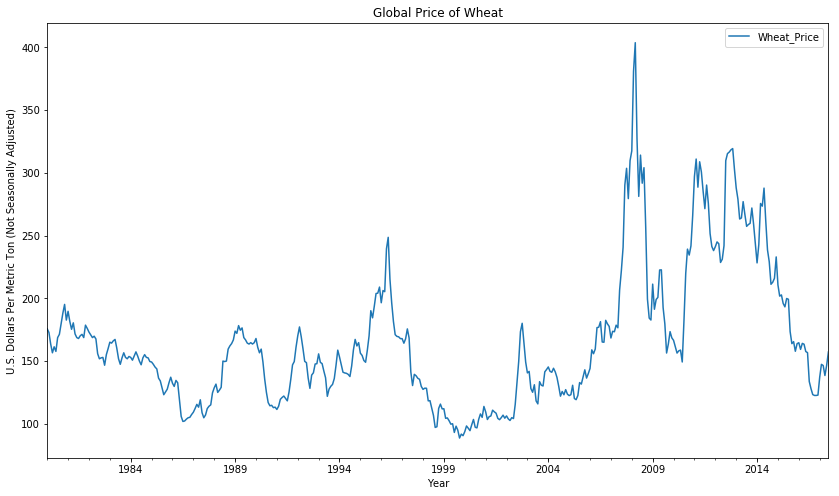

In [24]:
title2 = 'Global Price of Wheat'
ylabel2 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel2 = 'Year'

ax2 = wheat2.plot(figsize=(14,8), title=title2)
ax2.autoscale(axis='x', tight=True)
ax2.set(xlabel=xlabel2, ylabel=ylabel2);

### D. Join Corn and Wheat Price Time-Series Data Together, and Inspect and Visualize Resulting Data Set 

Execute left join between corn2 and wheat2 dataframes, and check for missing price values in join.

In [25]:
corn_wheat1 = corn2.join(wheat2)

In [26]:
corn_wheat1.isnull().sum().sort_values(ascending=False)

Wheat_Price    0
Corn_Price     0
dtype: int64

View first five rows of joined dataframe.

In [27]:
corn_wheat1.head()

,Corn_Price,Wheat_Price
Date,,
1980-01-01,105.506813,175.634750
1980-02-01,114.167831,172.695236
1980-03-01,109.837318,163.509323
1980-04-01,108.262604,156.528030
1980-05-01,109.837318,161.304703


View last five rows of joined dataframe.

In [28]:
corn_wheat1.tail()

,Corn_Price,Wheat_Price
Date,,
2017-02-01,162.880519,147.313095
2017-03-01,158.966282,146.387567
2017-04-01,156.442032,138.412425
2017-05-01,158.591272,146.486143
2017-06-01,157.956013,157.196087


View structure of joined dataframe.

In [29]:
corn_wheat1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 2 columns):
Corn_Price     450 non-null float64
Wheat_Price    450 non-null float64
dtypes: float64(2)
memory usage: 10.5 KB


Plot out the corn and wheat price data, and choose a reasonable figure size.

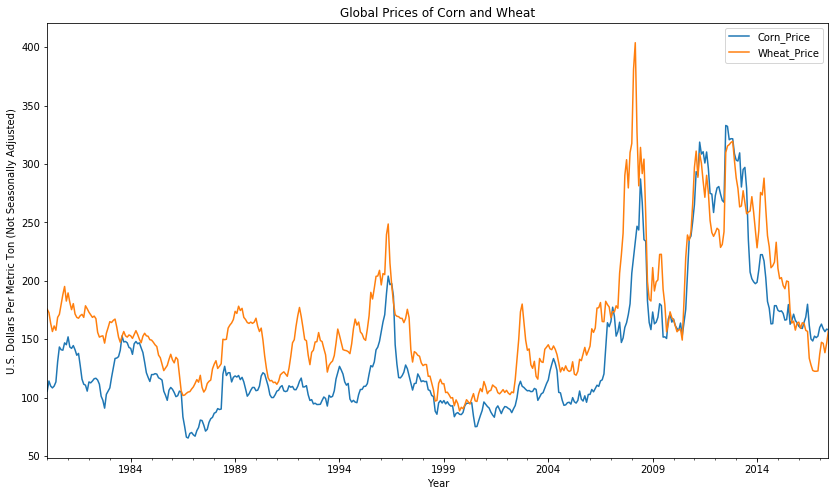

In [30]:
title3 = 'Global Prices of Corn and Wheat'
ylabel3 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel3 = 'Year'

ax3 = corn_wheat1.plot(figsize=(14,8), title=title3)
ax3.autoscale(axis='x', tight=True)
ax3.set(xlabel=xlabel3, ylabel=ylabel3);

* Over the long run, the global corn price appears to move closely together with the global wheat price. These two time series may be cointegrated by having a common stochastic or random trend. What also supports the case for cointegration between these series is that corn and wheat are economic substitutes towards one another. In Part 3, I will determine whether the corn and wheat prices are cointegrated or not.  

### E. Export Joined Corn and Wheat Price Time-Series Data

Export corn and wheat price data to CSV file.

In [31]:
corn_wheat1.to_csv('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/corn_wheat_prices.csv', sep=',', index=False)

Save corn and wheat price data to pickle file for following time-series analysis and forecasting notebooks.

In [32]:
corn_wheat1.to_pickle('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/corn_wheat_prices.pickle')